# Lab Assignment 11: Data Visualizations
## DS 6001: Practice and Application of Data Science
## Name: Afnan Alabdulwahab

### Instructions
Please answer the following questions as completely as possible using text, code, and the results of code as needed. Format your answers in a Jupyter notebook. To receive full credit, make sure you address every part of the problem, and make sure your document is formatted in a clean and professional way.

## Problem 0
Import the following libraries:

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Problem 1
Write a short paragraph that provides a critique of the following data visualizations. What's good about each figure, and what's not good? Pay particular attention to how well the figure communicates information to a general audience and tells a complete story. Make specific references to the ideas discussed in the first section of the Module 11 Jupyter notebook.

### Part a
<img src="https://i.reddituploads.com/09d4079fd0bf453586b8524478aac4fd?fit=max&h=1536&w=1536&s=0d63d22eed3d44a41002007990acdf2c" width='500'>

[1 point]

On the positive side, the visualization has clear labels and distinct colors, making the data easy to understand. On the negative side, the bar lengths are not proportional to the percentages, misleading the viewer about the relative sizes of each group. Additionally, the inconsistent y-axis scaling further distorts the visual comparison between categories. The bars are not ordered in a logical way; they should ideally be arranged from most concerned to least concerned, or vice versa. A good data visualization should avoid such distortions and provide an accurate and proportional representation of data to effectively communicate the intended information to the audience.

### Part b
<img src="https://www.designyourway.net/diverse/2/wronginfo/59426786926.jpg" width='600'>

[1 point]

The pie chart provides a clear title labels with percentages for each sector which, helps in understanding the data distribution. Also, sectors are ordered by percentage, making it easier to follow. However, the "Other" category is quite large (34.6%), suggesting the data categorization could be improved. On the negative side, the 3D effect distorts the actual proportions, making it difficult to accurately compare sectors. additionally, some labels are hard to read due to the small font size and the crowded labels around the pie chart can be hard to read.

### Part c
<img src="https://i.imgur.com/sTVYOIH.jpg" width='400'>

[1 point]

On the positive side, this line chart highlights a key event (the 2005 'Stand Your Ground' law) which provides context and helps viewers understand the portntial impact of the policy change. In adddition, the visulaization is showing a timeline from 1980s to 2010s showing trend over a significant peroid which helps in communicating long-term changes. On the negative side, the inverted y-axis may confuse the general audience, the x-axis labels are vague without specific dates for each data point, and the red background is distracting without adding informational value.

## Problem 2
For the rest of this lab, we will once again be working with the 2019 General Social Survey.

In [3]:
%%capture
gss = pd.read_csv("https://github.com/jkropko/DS-6001/raw/master/localdata/gss2018.csv",
                 encoding='cp1252', na_values=['IAP','IAP,DK,NA,uncodeable', 'NOT SURE',
                                               'DK', 'IAP, DK, NA, uncodeable', '.a', "CAN'T CHOOSE"])

Here is code that cleans the data and gets it ready to be used for data visualizations:

In [5]:
mycols = ['id', 'wtss', 'sex', 'educ', 'region', 'age', 'coninc',
          'prestg10', 'mapres10', 'papres10', 'sei10', 'satjob',
          'fechld', 'fefam', 'fepol', 'fepresch', 'meovrwrk'] 
gss_clean = gss[mycols]
gss_clean = gss_clean.rename({'wtss':'weight', 
                              'educ':'education', 
                              'coninc':'income', 
                              'prestg10':'job_prestige',
                              'mapres10':'mother_job_prestige', 
                              'papres10':'father_job_prestige', 
                              'sei10':'socioeconomic_index', 
                              'fechld':'relationship', 
                              'fefam':'male_breadwinner', 
                              'fehire':'hire_women', 
                              'fejobaff':'preference_hire_women', 
                              'fepol':'men_bettersuited', 
                              'fepresch':'child_suffer',
                              'meovrwrk':'men_overwork'},axis=1)
gss_clean.age = gss_clean.age.replace({'89 or older':'89'})
gss_clean.age = gss_clean.age.astype('float')

The `gss_clean` dataframe now contains the following features:

* `id` - a numeric unique ID for each person who responded to the survey
* `weight` - survey sample weights
* `sex` - male or female
* `education` - years of formal education
* `region` - region of the country where the respondent lives
* `age` - age
* `income` - the respondent's personal annual income
* `job_prestige` - the respondent's occupational prestige score, as measured by the GSS using the methodology described above
* `mother_job_prestige` - the respondent's mother's occupational prestige score, as measured by the GSS using the methodology described above
* `father_job_prestige` -the respondent's father's occupational prestige score, as measured by the GSS using the methodology described above
* `socioeconomic_index` - an index measuring the respondent's socioeconomic status
* `satjob` - responses to "On the whole, how satisfied are you with the work you do?"
* `relationship` - agree or disagree with: "A working mother can establish just as warm and secure a relationship with her children as a mother who does not work."
* `male_breadwinner` - agree or disagree with: "It is much better for everyone involved if the man is the achiever outside the home and the woman takes care of the home and family."
* `men_bettersuited` - agree or disagree with: "Most men are better suited emotionally for politics than are most women."
* `child_suffer` - agree or disagree with: "A preschool child is likely to suffer if his or her mother works."
* `men_overwork` - agree or disagree with: "Family life often suffers because men concentrate too much on their work."

### Part a
Reorder the categories of `relationship` to "strongly agree", "agree", "disagree", and "strongly disagree".

Then create a simple barplot that shows the frequencies of the categories of `relationship` three times: 
* once using `matplotlib` alone, 
* once using `seaborn`, 
* and once using the `.plot()` method from `pandas`. 

Make sure each barplot has descriptive axis labels and a title, and set a good size for each figure displayed in the Jupyter notebook. [2 points]

To reorder categories, I first change the column to a category data type:

In [8]:
gss_clean['relationship'] = gss_clean['relationship'].astype('category')

Then, I will use the `.cat.reorder_categories()` method to rearrange the columns so that they are in the following order: strongly agree, agree, disagree, strongly disagree:

In [9]:
gss_clean['relationship'] = gss_clean['relationship'].cat.reorder_categories(['strongly agree', 'agree', 'disagree', 'strongly disagree'])

#### barplot that shows the frequencies of the categories of `relationship` using `matplotlib`:
To count the values of each category of `relationship`, I'll use the `.value_counts()` method and chain the `.sort_index()` method to make sure the categories appear in the order we want. Finally, I store the counts in a variable `mybars`:

In [10]:
mybars = gss_clean.relationship.value_counts().sort_index()
mybars

relationship
strongly agree       480
agree                670
disagree             324
strongly disagree     76
Name: count, dtype: int64

Then, I'll use the `plt.bar()` function, which takes two arguments: the categories, stored in the `.index` attribute of `mybars`, and the values, stored in `.values`. In addition, I'll use `plt.ylabel()`, `plt.xlabel()`, and `plt.title()` to add axis labels and a title:

Text(0.5, 1.0, 'Agreement Levels on Working Mothers Establishing Warm Relationships with Childern')

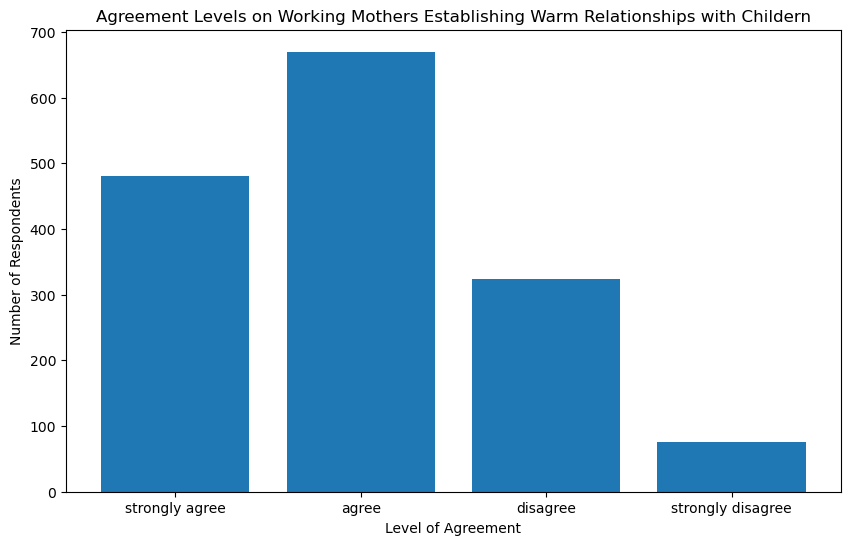

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(mybars.index, mybars.values)

plt.xlabel('Level of Agreement')
plt.ylabel('Number of Respondents')
plt.title('Agreement Levels on Working Mothers Establishing Warm Relationships with Childern')

#### barplot that shows the frequencies of the categories of `relationship` using `seaborn`:
Using the `sns.barplot` from the `seaborn` package passing `mybars.index` for the `x` argument and `mybars.values` for the `y` argument. `seaborn` graphics use the same functions as matplotlib to change the title and axes:

Text(0.5, 1.0, 'Agreement Levels on Working Mothers Establishing Warm Relationships with Childern')

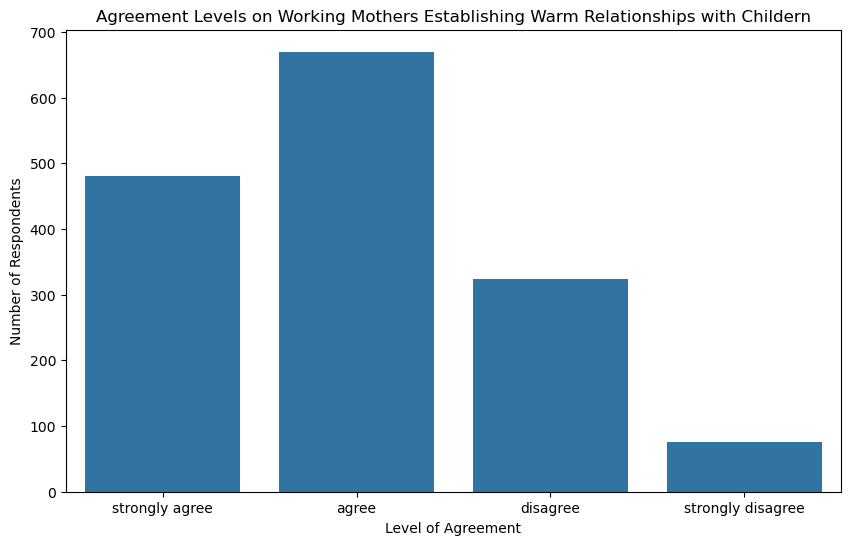

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=mybars.index, y=mybars.values)

plt.xlabel('Level of Agreement')
plt.ylabel('Number of Respondents')
plt.title('Agreement Levels on Working Mothers Establishing Warm Relationships with Childern')

#### barplot that shows the frequencies of the categories of `relationship` using `.plot()` method from `pandas`:
To create a barplot using the `.plot()` method in `pandas`, first I save the values as a dataframe, and then apply `.plot()` to the dataframe. Passing `'bar'` to the `kind` argument, the x and y features to the `x` and `y` arguments, and  `False` to the `legend` argument to remove the legend from the corner:

In [23]:
mybars_df = mybars.reset_index()
mybars_df

,relationship,count
0,strongly agree,480
1,agree,670
2,disagree,324
3,strongly disagree,76


The .plot() method also uses the same matplotlib functions for setting the axis labels and title

Text(0.5, 1.0, 'Agreement Levels on Working Mothers Establishing Warm Relationships with Childern')

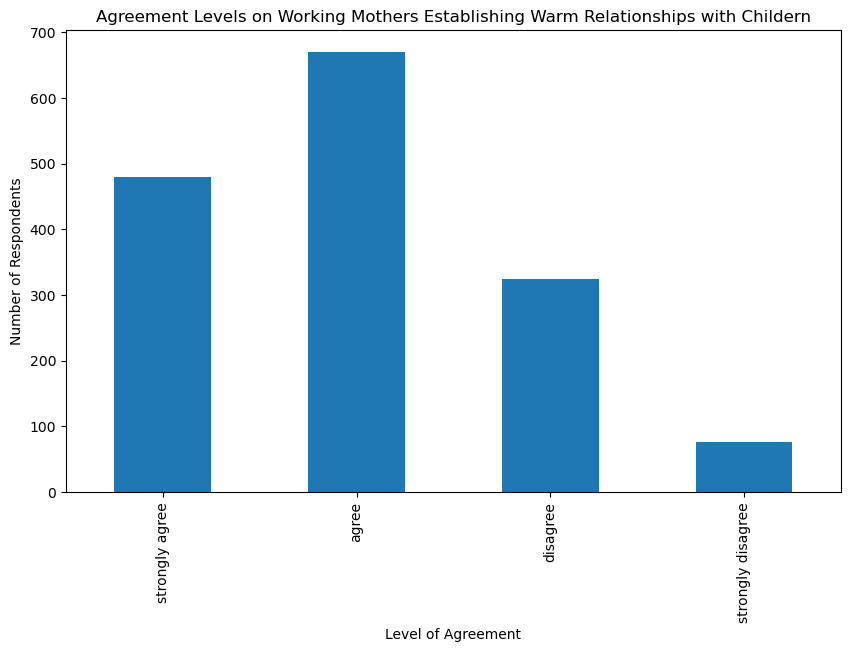

In [28]:
mybars_df.plot(kind='bar', x='relationship', y='count', figsize = [10,6], legend = False)

plt.xlabel('Level of Agreement')
plt.ylabel('Number of Respondents')
plt.title('Agreement Levels on Working Mothers Establishing Warm Relationships with Childern')

### Part b
Create two barplots that show 
* the frequency of the different levels of agreement for `relationship` for men and for women on the same plot, 
* with bars for men and bars for women side-by-side,
* using different colors for the bars for men and the bars for women,
* listing these colors and the sex they refer to in a legend,
* and labeling each bar with the number the bar represents.

Create the first barplot using `seaborn` with the bars oriented vertically, and create the second barplot using the `.plot()` method with the bars oriented horizontally. [2 points]

### The first barplot using `seaborn` with the bars oriented vertically:
First, let's group the data according to the features using `.groupby()`. Then we can get counts within every combination for Relationship level-of-agreement and gender/sex by chaining the `.size()` method to the `groupby()` call:

In [32]:
relationship_sex_plt = gss_clean.groupby(['relationship', 'sex']).size()
relationship_sex_plt = relationship_sex_plt.reset_index()
relationship_sex_plt = relationship_sex_plt.rename({0: 'count'}, axis=1)
relationship_sex_plt

/var/folders/c9/9dpn8j8s2cb5mjl9rjm_s0k00000gn/T/ipykernel_19516/1448540682.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relationship_sex_plt = gss_clean.groupby(['relationship', 'sex']).size()


,relationship,sex,count
0,strongly agree,female,337
1,strongly agree,male,143
2,agree,female,344
3,agree,male,326
4,disagree,female,146
5,disagree,male,178
6,strongly disagree,female,39
7,strongly disagree,male,37


Now we can create a barplot in which each relationship agreement level contains two bars representing each sex. To constuct this plot with `seaborn` I will add the `hue` argument and set it equal to `sex`:

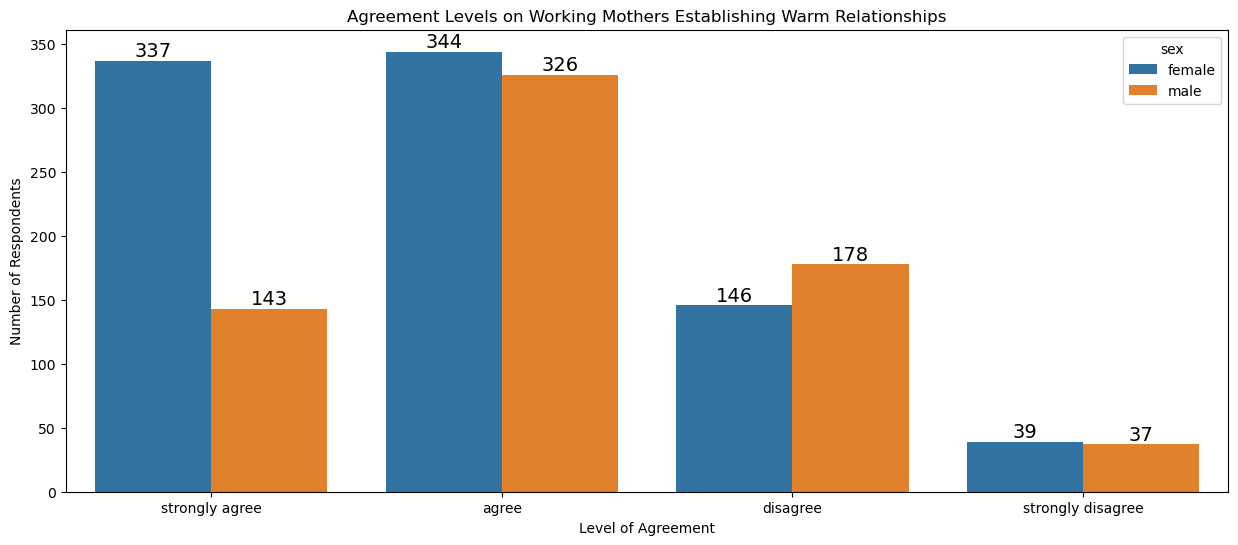

In [37]:
plt.figure(figsize=(15, 6))
myplot = sns.barplot(x='relationship', y='count', hue='sex', data=relationship_sex_plt)
plt.xlabel('Level of Agreement')
plt.ylabel('Number of Respondents')
plt.title('Agreement Levels on Working Mothers Establishing Warm Relationships')

for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    if ycoor > 0:  # Only add text if the height is greater than 0
        plt.text(xcoor, ycoor, str(int(ycoor)), 
                 horizontalalignment='center', 
                 verticalalignment='bottom',
                 fontsize=14)

### The second barplot using the `.plot()` method with the bars oriented horizontally:
To generat grouped bars using `.plot()` method, I will arrange the data so that one categorical feature compromises the rows and the other compromises the columns. To do that I will generat a cross-tab:

In [40]:
xtab = pd.crosstab(gss_clean.relationship, gss_clean.sex)
xtab

sex,female,male
relationship,,
strongly agree,337,143
agree,344,326
disagree,146,178
strongly disagree,39,37


Now, I can apply the `.plot()` method to this cross-tab and use `barh` for the `kind` argument to plot horrizontally:

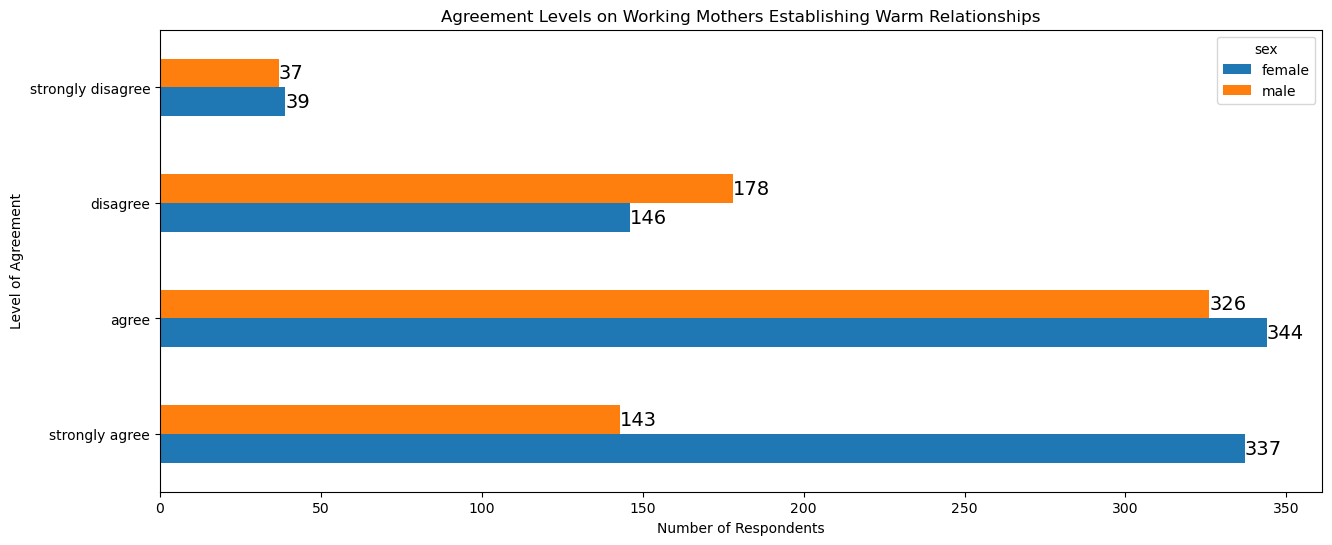

In [42]:
myplot = xtab.plot(kind='barh', figsize = [15, 6])
plt.ylabel('Level of Agreement')
plt.xlabel('Number of Respondents')
plt.title('Agreement Levels on Working Mothers Establishing Warm Relationships')
for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)

### Part c
Create a visualization with 
* nine barplots, arranged in a 3x3 grid. 
* The barplots should refer to each of the nine categories of `region`, 
* and each barplot should be given a label that contains the name of the region.
* Within each barplot, list the categories of `relationship`,
* and display horizontal bars.

Only one figure is required. Use `seaborn`, `matplotlib`, and `.plot()` as you see fit. [2 points]

First, let's group the data according to the features using `.groupby()`. Then we can get counts within every combination for Relationship level-of-agreement and region by chaining the `.size()` method to the `groupby()` call:

In [60]:
region_plot = gss_clean.groupby(['region', 'relationship']).size().reset_index()
region_plot = region_plot.rename({0: 'count'}, axis=1)

/var/folders/c9/9dpn8j8s2cb5mjl9rjm_s0k00000gn/T/ipykernel_19516/530781321.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  region_plot = gss_clean.groupby(['region', 'relationship']).size().reset_index()


Next, I will use the `sns.FacetGrid()` function and pass the groupd dataframe that I named `region_plot` as the first argument. Since we have one grouping column, I will use the `col` argument without `row` and pass the feature `region`. In addition, I will also use the `col_wrap` argument to specify how many plots to list in each row.
Lastly, to define what graph goes inside each cell, I will use the `.map()` method on the output of the `sns.FacetGrid()`.

To give these cells better labels, I am using `.set_titles('{col_name}')` where {col_name} is code that refers to the name of the categroy that defines that column. To set the axis labels, I am using `.set_axis_labels('Number of Respondents', 'Level of Agreement')` where the first entry is the label of the x-axis in each cell, and the second entry is the label of the y-axis in each cell. Lastly, to give the figure an overall title, first I use `.fig.subplots_adjust()` to create white space at the top of the grid to create space for the title. Then, I use the `.fig.suptitle()` function to set the title and define the fontsize of the title:

Text(0.5, 0.98, 'Agreement Levels on Working Mothers Establishing Warm Relationships, by Region Group')

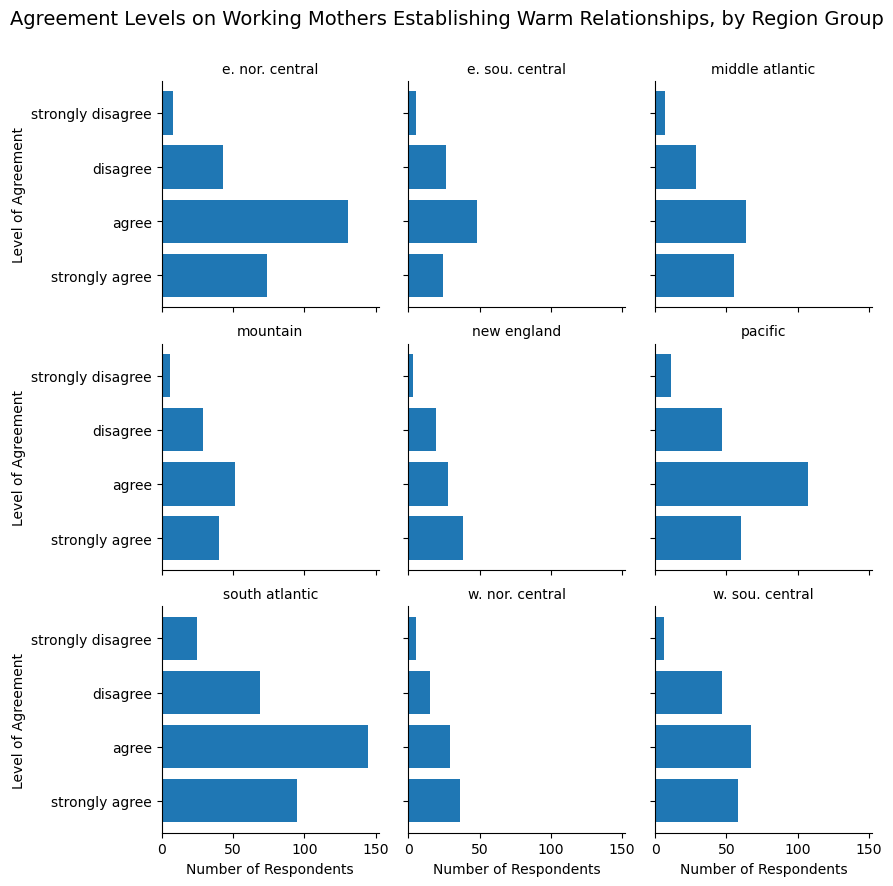

In [63]:
g = sns.FacetGrid(region_plot, col = 'region', col_wrap=3, height=3, aspect=1)
g.map(plt.barh, 'relationship', 'count')

g.set_titles('{col_name}')
g.set_axis_labels('Number of Respondents', 'Level of Agreement') 
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Agreement Levels on Working Mothers Establishing Warm Relationships, by Region Group', fontsize=14)

## Problem 3
Write code that exactly replicates the following figures, including all aesthetic choices. **Don't worry, however, about making the size of the figures exactly the same as that varies from browser to browser.** All of the following figures are generated by a primary graphing function from `seaborn`. 

### Part a
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/parta.png" width='700'>

[Hint: the values of occuptational prestige and socioeconomic status are the means of `job_prestige` and `socioeconomic_index` within years of `education`. Note that values of `education` less than 8 are excluded.] [2 points]

To prepare the data for plotting multiple features against the same index, I first created a dataframe in long format. This involved calculating the average `job_prestige` score and `socioeconomic_index` for each year of `education`. The steps are as follows:

1. **Group and Aggregate**: The data is grouped by `education` and the mean values of `job_prestige` and `socioeconomic_index` are calculated.
2. **Reshape**: The resulting dataframe is converted to long format using `pd.melt()`, with `education` as the identifier.
3. **Rename Columns**: The columns are renamed to `Index` and `Value` to match the plot in the question.
4. **Map Descriptive Names**: The `Index` values are mapped to more descriptive names (`Occupational Prestige` and `Socioeconomic Status`) to match the plot in the question.

In [80]:
gss_line = gss_clean.groupby('education'). agg({'job_prestige': 'mean',
                                                'socioeconomic_index': 'mean'}).reset_index()
gss_line_long = pd.melt(gss_line, id_vars='education', 
                        value_vars=['job_prestige', 'socioeconomic_index'],
                        var_name='variable', value_name='value')
gss_line_long = gss_line_long.rename({'variable':'Index', 'value':'Value'}, axis=1)
gss_line_long['Index'] = gss_line_long['Index'].map({'job_prestige': 'Occupational Prestige',
                                                     'socioeconomic_index': 'Socioeconomic Status'})
gss_line_long

,education,Index,Value
0,0.0,Occupational Prestige,38.500000
1,1.0,Occupational Prestige,37.000000
2,2.0,Occupational Prestige,32.500000
3,3.0,Occupational Prestige,31.666667
4,4.0,Occupational Prestige,32.800000
5,5.0,Occupational Prestige,34.666667
6,6.0,Occupational Prestige,34.000000
7,7.0,Occupational Prestige,36.428571
8,8.0,Occupational Prestige,34.575758
9,9.0,Occupational Prestige,37.416667


To generate the line plot, I used the `sns.lineplot()` function from the `seaborn` package. To overlay multiple lines on the same axes, I set `education` as the x-axis, `Value` as the y-axis, and used `hue='Index'` to differentiate the lines by color, with a legend generated by default. To use different line types, I included `style='Index'`. I filtered the data with `data=gss_line_long.query("education > 7")` to exclude values of education less than 8.

I then used `plt.figure()`, `plt.xlabel()`, `plt.ylabel()`, and `plt.title()` to set the figure size, label the axes, and add a title. Finally, I used `plt.ylim(0,80)` to match the y-axis range of the plot in the question.

This plot represents the average job prestige score and socioeconomic status against years of education:

(0.0, 80.0)

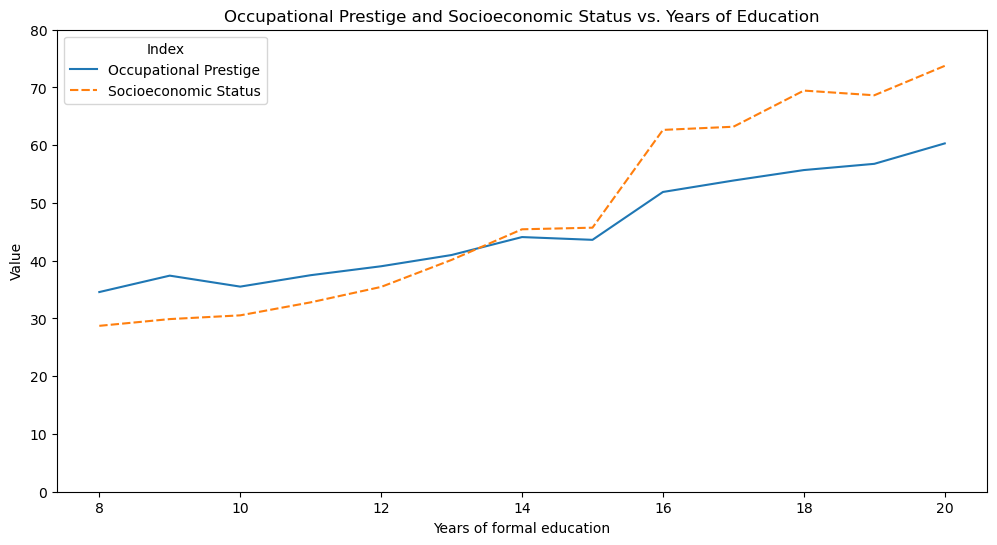

In [92]:
plt.figure(figsize=(12,6))
sns.lineplot(x='education', y='Value',
             hue='Index', style='Index',
             data=gss_line_long.query("education > 7"))
plt.xlabel('Years of formal education')
plt.ylabel('Value')
plt.title('Occupational Prestige and Socioeconomic Status vs. Years of Education')
plt.ylim(0,80)

### Part b
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localimages/partb.png" width='700'>

[Hint: to match the color scheme, you will need to set `center=0`.] [2 points]

First, I generated a correlation matrix between the variables shown in the figure

In [97]:
my_corr = gss_clean.loc[:,['job_prestige','father_job_prestige', 'mother_job_prestige', 'income', 'socioeconomic_index']].corr()
my_corr

,job_prestige,father_job_prestige,mother_job_prestige,income,socioeconomic_index
job_prestige,1.000000,0.192180,0.189262,0.340995,0.835515
father_job_prestige,0.192180,1.000000,0.235750,0.171048,0.210451
mother_job_prestige,0.189262,0.235750,1.000000,0.164881,0.203486
income,0.340995,0.171048,0.164881,1.000000,0.417210
socioeconomic_index,0.835515,0.210451,0.203486,0.417210,1.000000


To display a heatmap, I passed the correlation matrix to the `sns.heatmap()` function. I set `center=0` to change the colors to emphasize that zero is explicitly in the middle of the scale. To annotate the heatmap with the values each color represents, I used `annot=True`:

Text(0.5, 1.0, 'Correlation Between Personal Economic Indicators')

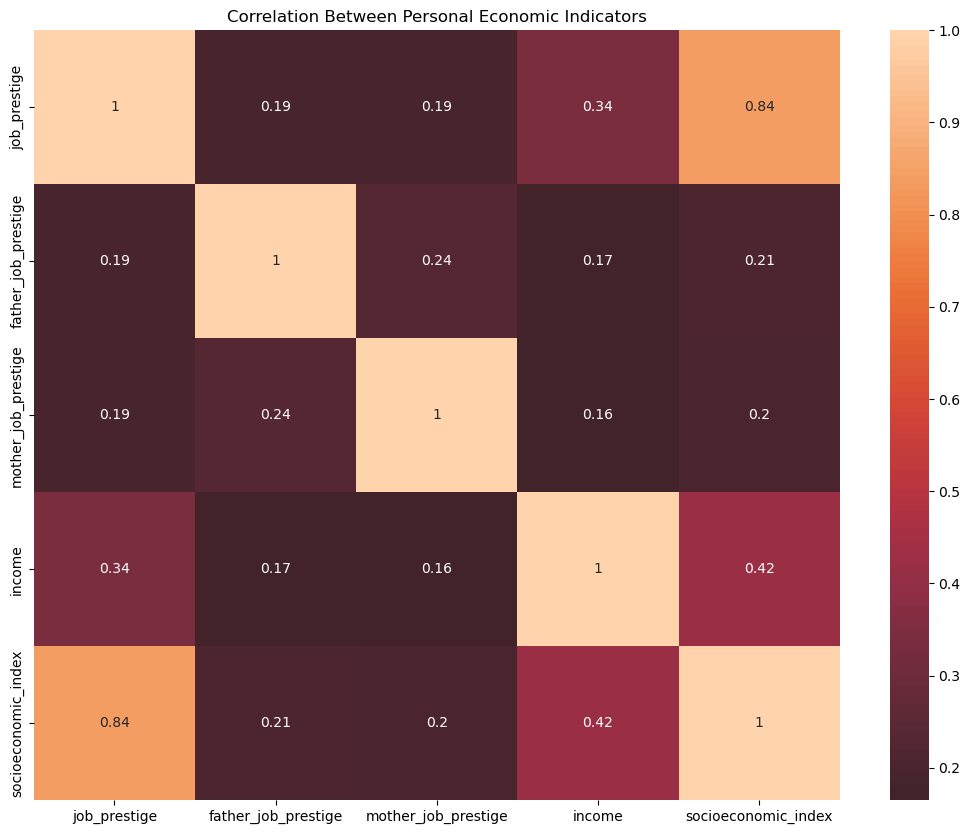

In [99]:
plt.figure(figsize = (13,10))
sns.heatmap(my_corr, center=0, annot=True)
plt.title("Correlation Between Personal Economic Indicators")

### Part c
Replicate the following figure:
<img src="https://raw.githubusercontent.com/jkropko/DS-6001/master/localdata/partc2.png" width='600'>

[Hint: The individual plots inside the grid have `height=4` and `aspect=1`, and to include the overall title I used
```
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)
```
You will first need to create a version of `education` that collapses values from 0 to 10 to "10 years or fewer" and collapses values from 17 to 20 to "More than 16 years". You can use `.map()`, `.replace()`, or `pd.cut()` to do that.] [3 points]

To categorize the `education` values into the specified groups, I used a dictionary mapping approach. First, I created a dictionary `education_map` to map values from 0 to 10 to "10 years or fewer" and values from 17 to 20 to "More than 16 years". Then, I assigned the values from 11 to 16 to themselves, formatted as strings. Finally, I applied this mapping to the `education` column using the `.map()` function, creating a new column `education_collapsed`.

In [111]:
education_map = {i: '10 years or fewer' for i in range(0, 11)}
education_map.update({i: 'More than 16 years' for i in range(17, 21)})

for i in range(11, 17):
    education_map[i] = f"{i} years"

gss_clean['education_collapsed'] = gss_clean['education'].map(education_map)

gss_clean[['education', 'education_collapsed']].head(5)

,education,education_collapsed
0,14.0,14 years
1,10.0,10 years or fewer
2,16.0,16 years
3,16.0,16 years
4,18.0,More than 16 years


To reorder the age categories to match the figure in the question, I first changed the column to a category data type. Then, I used the `.cat.reorder_categories()` method to rearrange the categories into the desired order. This ensures the categories are displayed in the correct order for plotting:

In [112]:
gss_clean['education_collapsed'] = gss_clean['education_collapsed'].astype('category')
gss_clean['education_collapsed'] = gss_clean['education_collapsed'].cat.reorder_categories(['10 years or fewer', '11 years', 
                                                                                            '12 years', '13 years', '14 years', 
                                                                                            '15 years', '16 years', 'More than 16 years'])

Next, I used the `sns.FacetGrid()` function, passing the `gss_clean` dataframe as the first argument. I used the `col` argument to specify the `education_collapsed` column and the `col_wrap` argument to set how many plots to list in each row. To define the graph in each cell, I used the `.map()` method on the `sns.FacetGrid()` output, applying `sns.regplot()` to include a line of best fit on a scatterplot, showing the relationship between `income` and `job_prestige` for each education group.

To set the titles and labels, I used `.set_titles('{col_name}')` where `{col_name}` refers to the name of the category defining that column. I set the axis labels with `g.set_axis_labels('Occupational Prestige', 'Income')`, where the first entry is the x-axis label and the second is the y-axis label in each cell. Finally, I adjusted the overall figure by creating white space at the top of the grid with `.fig.subplots_adjust()` and added an overall title with `.fig.suptitle()`:

Text(0.5, 0.98, 'Income vs. Prestige by Education')

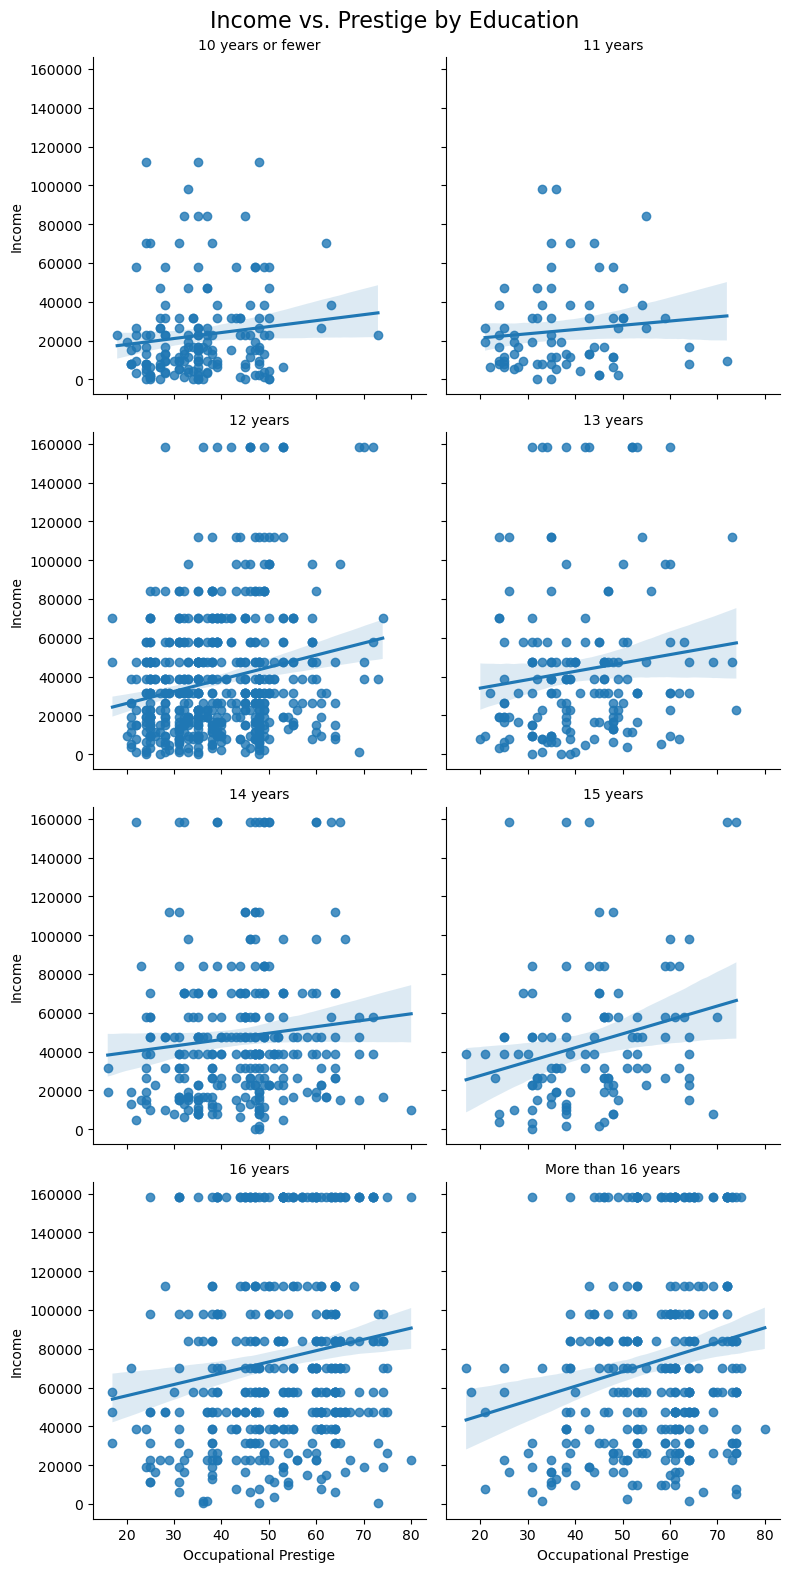

In [115]:
g = sns.FacetGrid(gss_clean, col='education_collapsed', col_wrap=2, height=4, aspect=1)
g.map(sns.regplot, 'job_prestige', 'income')

g.set_titles('{col_name}')
g.set_axis_labels('Occupational Prestige', 'Income') 
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('Income vs. Prestige by Education', fontsize=16)

## Problem 4
There is a consistent finding that in the United States that [women get paid only 80% of what men get paid](https://nwlc.org/issue/equal-pay-and-the-wage-gap/). Other research however finds that the gap is much smaller when comparing [men and women who hold the same job](https://www.politifact.com/factchecks/2018/apr/13/tina-smith/do-women-get-only-80-percent-pay-men-do-same-job/). In this problem you will use the GSS data to investigate the following questions:

1. Do men have higher incomes than women?

2. If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

You may use any kind of data visualization and you may use multiple visualizations to find an answer to these questions. In order to receive credit for this problem, you must write in text what parts of your visualizations are important and what we should learn from the visualizations to answer the questions. Please consider the entire distributions of income and occupational prestige, not just the means or medians. [4 points]

### Do men have higher incomes than women?

Density Plot:

Text(0, 0.5, 'Density')

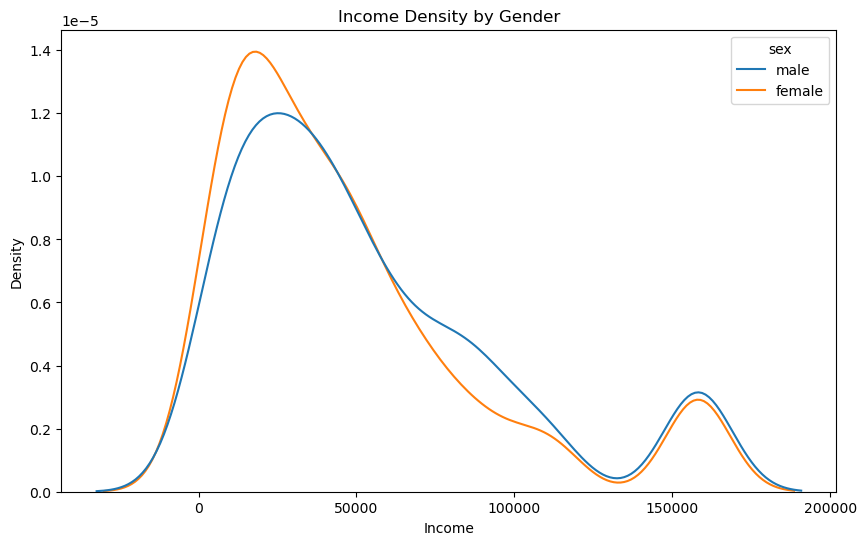

In [142]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=gss_clean, x='income', hue='sex', common_norm=False)
plt.title('Income Density by Gender')
plt.xlabel('Income')
plt.ylabel('Density')

The peak for women's income density is higher than men's, indicating a larger proportion of women earn around the lower income range. There is significant overlap in the middle-income ranges, but men tend to have a higher presence in the higher income brackets. Overall, the plot suggests that men generally have higher incomes than women, with men having a wider income range and higher densities in the higher income brackets. Women tend to cluster more around the lower to mid-income ranges

Violin Plot:

Text(0, 0.5, 'Income')

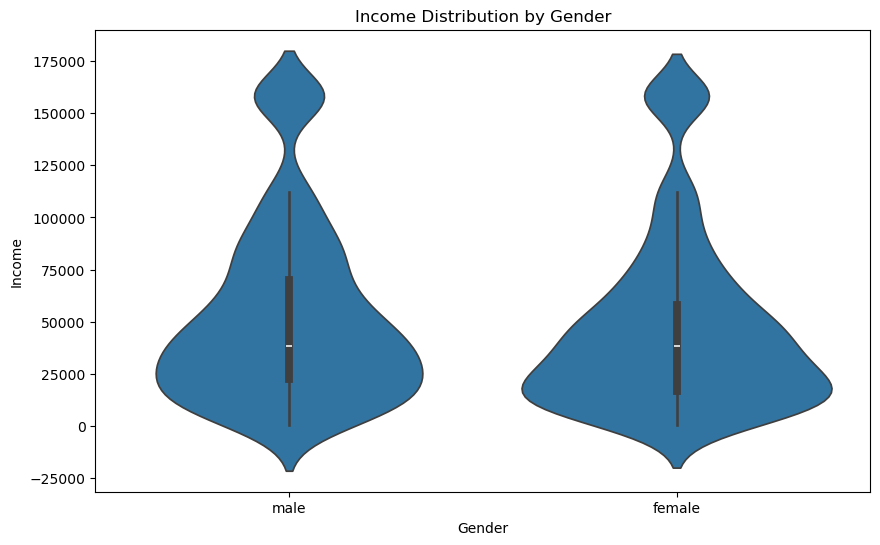

In [143]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='sex', y='income', data=gss_clean)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')

Both genders have similar overall income distributions, with most incomes concentrated below $75,000. This plot indicates that while the overall income distributions for men and women are similar, men tend to have a slightly higher median income and a broader distribution, particularly at higher income levels.

Box Plot:

Text(0, 0.5, 'Income')

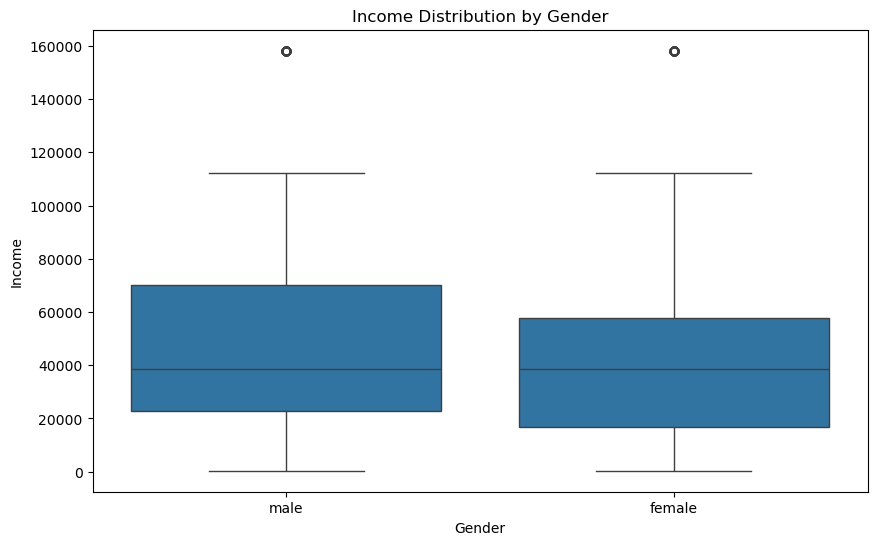

In [144]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='income', data=gss_clean)
plt.title('Income Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Income')

The box plot indicates that men generally have slightly higher median incomes and a broader income distribution. However, the central 50% of incomes for both genders are quite similar.

### If there is a difference, is this difference due to the fact that men have jobs with higher occupational prestige than women?

Histograms of Occupational Prestige by Gender:

Text(0, 0.5, 'Count')

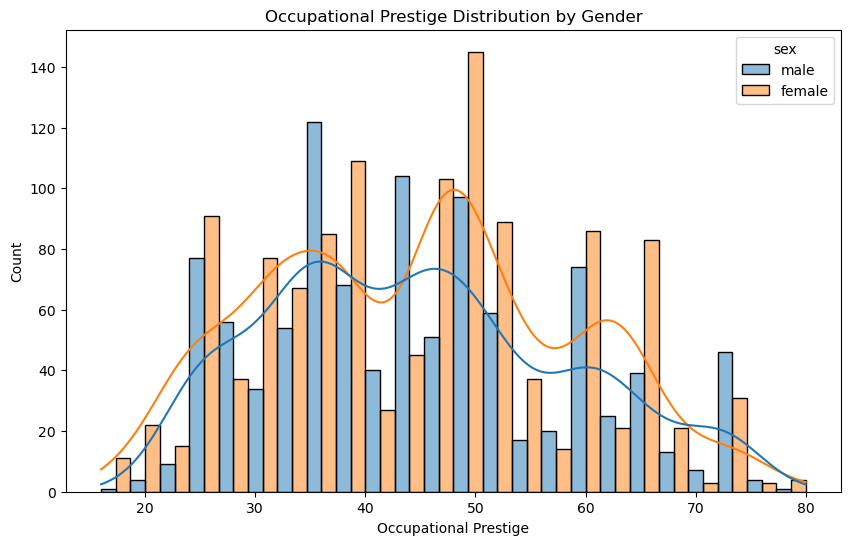

In [145]:
plt.figure(figsize=(10, 6))
sns.histplot(data=gss_clean, x='job_prestige', hue='sex', multiple='dodge', kde=True)
plt.title('Occupational Prestige Distribution by Gender')
plt.xlabel('Occupational Prestige')
plt.ylabel('Count')

This plot suggests that the difference in income could partly be due to men having jobs with higher occupational prestige than women, as men are more represented in both very low and very high prestige jobs, while women are more concentrated in the middle ranges. This indicates that while occupational prestige contributes to income differences, other factors might also play a role.

Line Plot of Income vs Occupational Prestige by Gender:

Preparing and reshaping the data:

In [147]:
gss_prestige_income = gss_clean[['sex', 'income', 'job_prestige']].dropna()
gss_prestige_income_long = pd.melt(gss_prestige_income, id_vars=['sex', 'job_prestige'], 
                                   value_vars=['income'], var_name='Index', value_name='Value')
gss_prestige_income_long

,sex,job_prestige,Index,Value
0,female,22.0,income,22782.5000
1,male,61.0,income,112160.0000
2,female,59.0,income,158201.8412
3,male,53.0,income,158201.8412
4,female,48.0,income,13143.7500
...,...,...,...,...
2070,female,31.0,income,38555.0000
2071,female,49.0,income,6309.0000
2072,female,28.0,income,22782.5000
2073,female,40.0,income,70100.0000


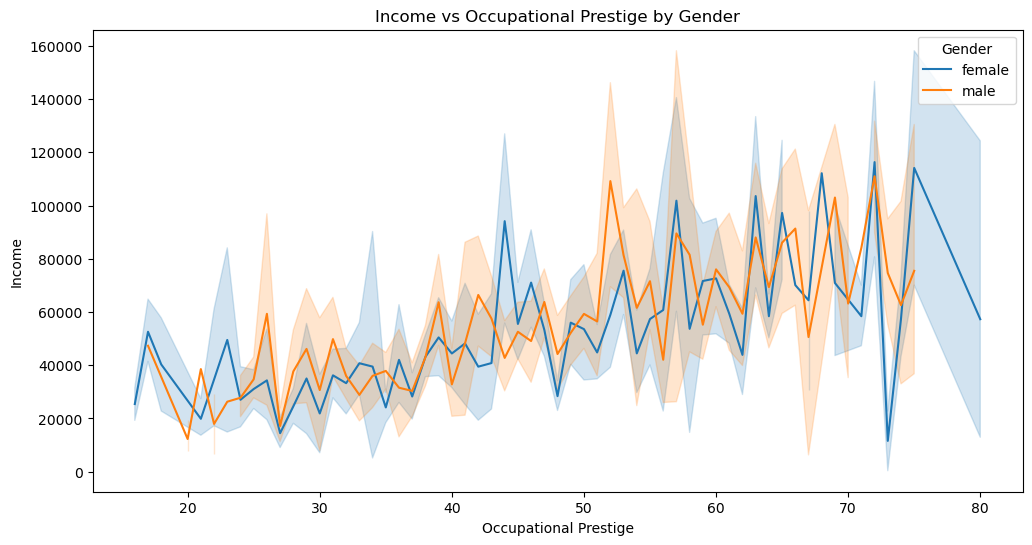

In [148]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='job_prestige', y='Value', hue='sex', data=gss_prestige_income_long)
plt.xlabel('Occupational Prestige')
plt.ylabel('Income')
plt.title('Income vs Occupational Prestige by Gender')
plt.legend(title='Gender')

The plot shows that both men and women generally earn more as occupational prestige increases. The lines for men and women are closely aligned, indicating that both genders receive similar income boosts with higher prestige jobs. Men tend to have slightly higher incomes than women at the highest levels of occupational prestige. This suggests that while both genders benefit from high-prestige jobs, men may receive higher compensation.

Overall, the plot suggests that while men and women with similar occupational prestige levels earn comparable incomes, men tend to have higher incomes in the highest prestige jobs. This indicates that occupational prestige alone does not fully explain the income difference between genders; other factors may also play a role.

### Summary:
**Findings:**
1. **Income Comparison**:
   - **Density Plot**: Men have a wider income range and higher density at higher incomes, indicating higher overall income.
   - **Violin and Box Plots**: Men show slightly higher median incomes and broader distributions, with a larger spread at higher incomes.

2. **Occupational Prestige**:
   - **Histogram**: Men dominate both very high and very low prestige jobs, while women are concentrated in mid-range prestige jobs.
   - **Line Plot**: Both genders see increased incomes with higher prestige, but men slightly outpace women at the highest levels.

**Conclusion**: 
Men generally have higher incomes than women, partly because men occupy more high-prestige jobs. However, the gap is not solely due to occupational prestige, as men tend to earn more even within the same prestige levels. This suggests that other factors also contribute to the income disparity between genders.